# Make more impactful charts by adding subtitles

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

%matplotlib inline

In [2]:
# !pip install nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

## Example 1

### Dremio vs BigQuery Performance

Data collected from a benchmarking experiment using [TPC-H benchmark data](https://www.tpc.org/tpch/) and queries.

In [3]:
DREMIO_BQ_DATA = """
dataset_size|bigquery|dremio
1|24.891|12.720
30|63.857|71.701
100|87.463|207.316
"""

DREMIO_COLOUR = "#43b8c9"
BQ_COLOUR = "#3367d6"

<IPython.core.display.Javascript object>

In [4]:
# read data string into Pandas Dataframe
data = pd.read_csv(StringIO(DREMIO_BQ_DATA), delimiter="|")
data

,dataset_size,bigquery,dremio
0,1,24.891,12.720
1,30,63.857,71.701
2,100,87.463,207.316


<IPython.core.display.Javascript object>

### Default Plot

Plotting the data and just adding a title.

We will also rename the x and y axis for clarity.

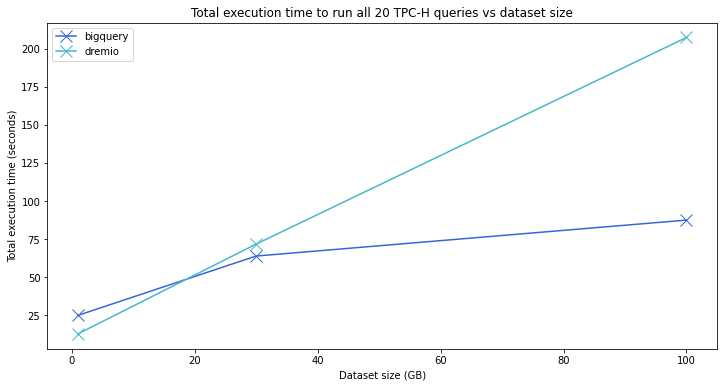

<IPython.core.display.Javascript object>

In [5]:
data.plot(
    x="dataset_size",
    color=[BQ_COLOUR, DREMIO_COLOUR],
    marker="x",
    figsize=(12, 6),
    markersize=12,
    legend=True,
)

# add functional title that describes what is being plotted
plt.title("Total execution time to run all 20 TPC-H queries vs dataset size")

# add labels to the chart axis
plt.ylabel("Total execution time (seconds)")
plt.xlabel("Dataset size (GB)")
plt.show()

The chart is 'functional'. But it takes the reader a while to understand the graph and interpret the results.

We can greatly aid the reader by adding a headline to the chart.

**Improved plot using plt.suptitle to add a headline**

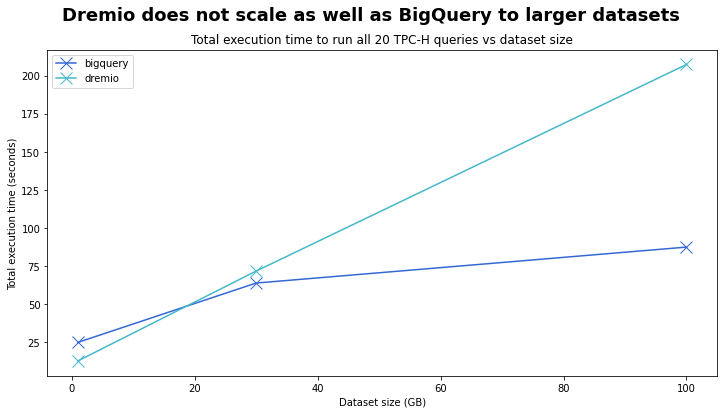

<IPython.core.display.Javascript object>

In [6]:
data.plot(
    x="dataset_size",
    color=[BQ_COLOUR, DREMIO_COLOUR],
    marker="x",
    figsize=(12, 6),
    markersize=12,
    legend=True,
)

# add functional title that describes what is being plotted
plt.title("Total execution time to run all 20 TPC-H queries vs dataset size")

# add labels to the chart axis
plt.ylabel("Total execution time (seconds)")
plt.xlabel("Dataset size (GB)")

# add a headline with key takeaway message
# increase font weight and size to differentiate it
plt.suptitle(
    "Dremio does not scale as well as BigQuery to larger datasets",
    fontweight="bold",
    fontsize=18,
)


plt.show()

The key take away from the graph is that Dremio does not scale as well as BigQuery to larger datasets (e.g. 100GB).

Note that the take home message might be different depending on the stakeholder.

For example, for a different stakeholder or use case, you might want to go the other way and use the headline:
> "Dremio outperforms BigQuery on small datasets"

This might be an important outcome if you are trying to serve a BI dashboard on small data which requires fast response times.

Make sure you tailor your message for the right audience and for the point you wish to convey. Sometimes there might be more than one way to interpret the data or more than one message.

**Final touches: improve other chart formatting**

The chart above is an improvement on the original. However, we can use a few other tricks to clean up the graphic and remove unecessary information which clutters the chart.

For example, the plot borders and axis tick values.

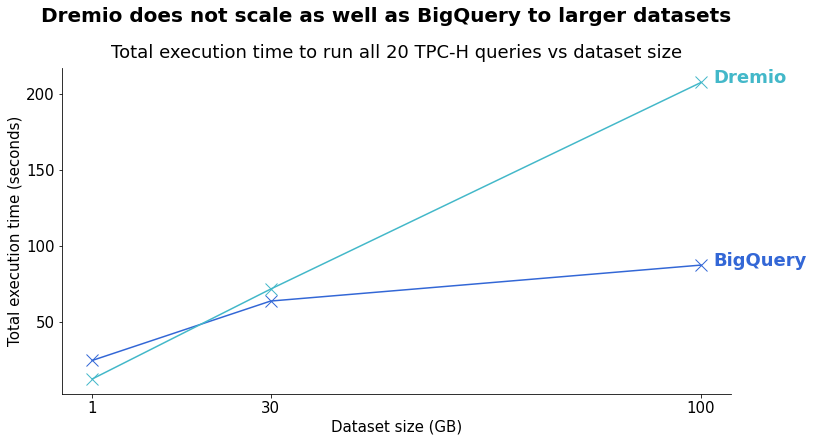

<IPython.core.display.Javascript object>

In [7]:
data.plot(
    x="dataset_size",
    color=[BQ_COLOUR, DREMIO_COLOUR],
    marker="x",
    figsize=(12, 6),
    markersize=12,
    legend=True,
)

# add functional title that describes what is being plotted
plt.title(
    "Total execution time to run all 20 TPC-H queries vs dataset size",
    fontsize=18,
    pad=10,
)

# add labels to the chart axis
plt.ylabel("Total execution time (seconds)", fontsize=15)
plt.xlabel("Dataset size (GB)", fontsize=15)

# add a headline with key takeaway message
# increase font weight and size to differentiate it
plt.suptitle(
    "Dremio does not scale as well as BigQuery to larger datasets",
    fontweight="bold",
    fontsize=20,
    y=1.02,
)

# minimise unecessary axis labels
plt.xticks([1, 30, 100], size=15)
plt.yticks([50, 100, 150, 200], size=15)


# explicitly annotate the graph lines with text
# instead of using a small legend in the top corner
plt.text(
    x=102,
    y=207,
    s="Dremio",
    fontdict={"color": DREMIO_COLOUR, "size": 18, "weight": "bold"},
)

plt.text(
    x=102,
    y=87,
    s="BigQuery",
    fontdict={"color": BQ_COLOUR, "size": 18, "weight": "bold"},
)
plt.legend("", frameon=False)


# remove unnecessary plot box lines
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.show()

# Example: 2 

## Stock Prices

In [8]:
# !pip install ffn
import ffn

<IPython.core.display.Javascript object>

In [9]:
# load daily stock prices from yahoo for SNP500 and NASDAQ
tickers = ["^gspc", "^IXIC"]
prices = ffn.get(tickers, start="2022-01-01", end="2022-04-27")

# rename the columns to their more common names
prices.columns = ["SNP500", "NASDAQ"]

# rebase prices so they are indexed to 100 from 1st January
rebased = prices.rebase()

<IPython.core.display.Javascript object>

/var/folders/1w/vfx1b5rs6_94c3jch9lbm4h40000gn/T/ipykernel_43335/618161683.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


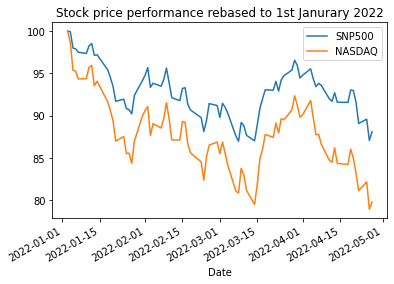

<IPython.core.display.Javascript object>

In [10]:
# plot
rebased.plot()

plt.title("Stock price performance rebased to 1st Janurary 2022")
plt.show()

**Add a more descriptive title**

/var/folders/1w/vfx1b5rs6_94c3jch9lbm4h40000gn/T/ipykernel_43335/2304014282.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


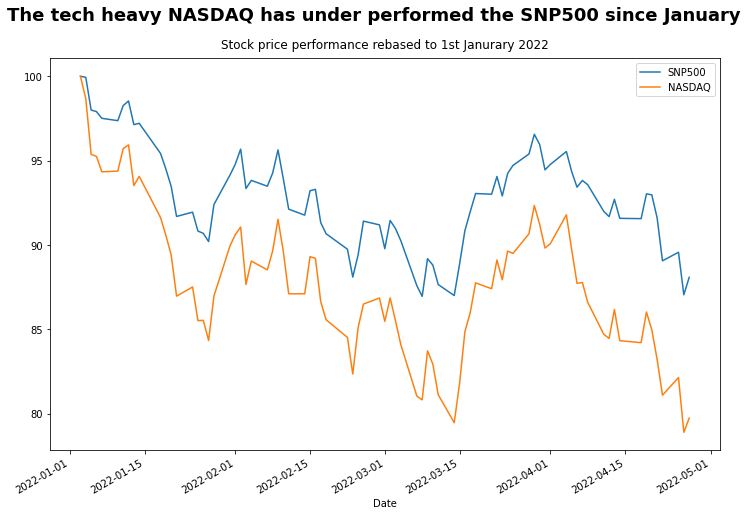

<IPython.core.display.Javascript object>

In [11]:
# plot
rebased.plot(figsize=(12, 8))

plt.title("Stock price performance rebased to 1st Janurary 2022", pad=10, fontsize=12)
plt.suptitle(
    "The tech heavy NASDAQ has under performed the SNP500 since January",
    fontsize=18,
    fontweight="bold",
    y=0.97,
)
plt.show()